part 1 = the data visualisation + preprocessing 

In [21]:
# import all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [22]:
# read the csv file
df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [23]:
# check the shape of the dataframe
df.shape


(21613, 21)

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [26]:
# convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])
# drop the sqft_lot15 column
df.drop('sqft_lot15', axis=1, inplace=True)

<Axes: >

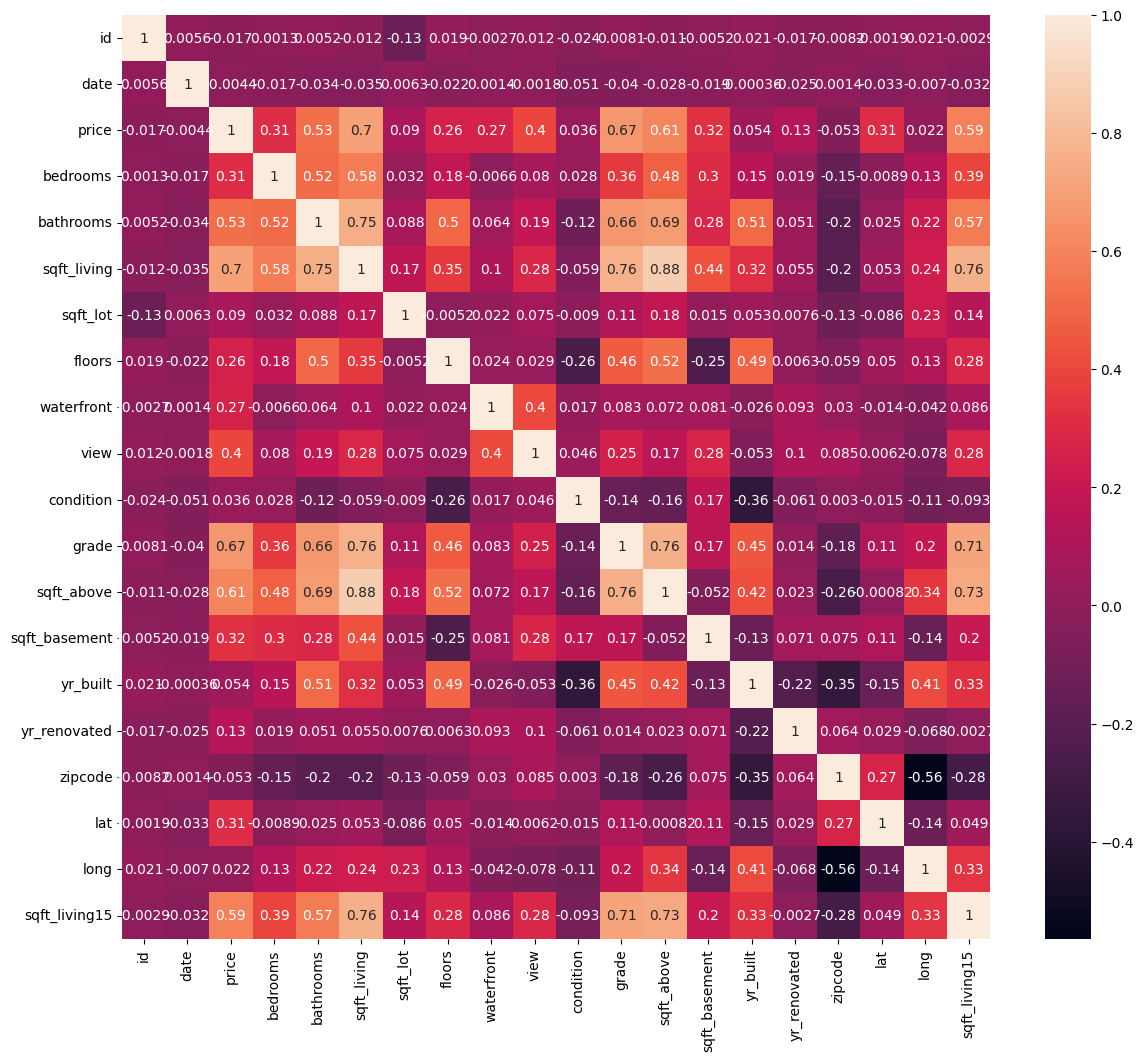

In [27]:
plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(),annot=True) 

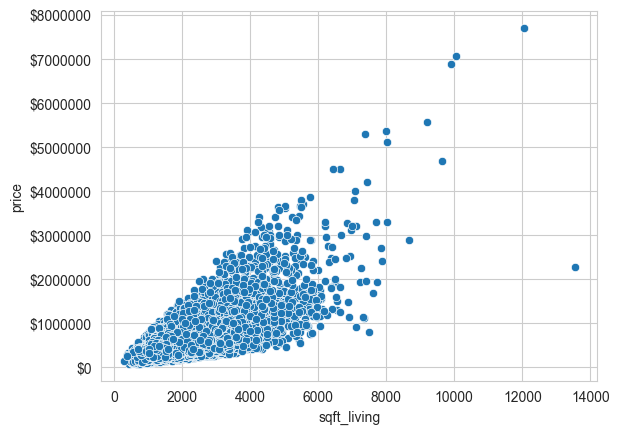

In [28]:
sns.set_style("whitegrid")
# Create a scatterplot of sqft_living by price using Seaborn
sns.scatterplot(x='sqft_living', y='price', data=df)
# Set the x and y axis labels
plt.xlabel('sqft_living')
plt.ylabel('price')
# Set the ticker format of the y-axis to display large numbers in a human-readable format
formatter = ticker.FormatStrFormatter('$%1.0f')
plt.gca().yaxis.set_major_formatter(formatter)
# Show the plot
plt.show()
# we can notice there is a linear relationship between the price and the sqft_living

In [29]:
# used this link to get help but there are some visualisations that i did not understand : https://www.kaggle.com/code/cyanidtht/makine1
# boxplots !
# i ve also has a problem with the sqft_lot15 so dropped it (it says cannot convert to float while unique values are integers)
# why this :df['zipcode']=df['zipcode'].astype('category')
# x=pd.get_dummies(x,drop_first=True)
# does the value in the x are put like they are and then summed or what ?


In [39]:
x=df[['bedrooms','bathrooms','sqft_living','floors','grade','waterfront','view','sqft_above','lat','sqft_basement']]
y=df[['price']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=13)
lr=LinearRegression()
regmodel=lr.fit(x_train,y_train)
y_pretest=regmodel.predict(x_test)  
# print the head of the the predicted vales and original values into a dataframe
df1 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pretest.flatten()})
df1.head(10)
# change values in the predicted column from these 3.666921e+05 to these 324900
df1['Predicted'] = df1['Predicted'].astype(int)
df1.head(10) 
# how far are the predicted values from the actual values
df1['Difference'] = df1['Actual'] - df1['Predicted']
df1.head(10)


,Actual,Predicted,Difference
0,324900.0,366692,-41792.0
1,306500.0,131671,174829.0
2,295000.0,161154,133846.0
3,288000.0,201216,86784.0
4,680000.0,691451,-11451.0
5,445000.0,233593,211407.0
6,1465000.0,1629610,-164610.0
7,230000.0,289528,-59528.0
8,801501.0,675662,125839.0
9,308000.0,575563,-267563.0


In [38]:
# i want to do the same first plot along with the line of predicted values of the model
# what is resid plot ?

,Actual,Predicted,Difference,sqft_living
0,324900.0,366692,-41792.0,NaN
1,306500.0,131671,174829.0,NaN
2,295000.0,161154,133846.0,NaN
3,288000.0,201216,86784.0,NaN
4,680000.0,691451,-11451.0,NaN
5,445000.0,233593,211407.0,NaN
6,1465000.0,1629610,-164610.0,1715.0
7,230000.0,289528,-59528.0,NaN
8,801501.0,675662,125839.0,NaN
9,308000.0,575563,-267563.0,1890.0


In [32]:
# * the loss and gradient
# * the model parameters
# * the lowess parameter
# *  sns.residplot()
# * Why residuals but not actual price vs predicted
# * Get all of the kind of plots and their use + the matrix plot search what’s called box with different colours 
# * Box plots 
# * How to reduce the error , what are the adjustment or the processs that you need to follow in order to determine that 
# * How does the models get ll of the features and then turn them into y point 
# * How the slope is calulted 
# * Did not really understand the logic of r-squared error, squared mean and how to get the best values out of them (again the process
# * Absolute error , mean error 
# * Regression plot, how does it differ from the actual plot (is it just the line because I noticed some points changes even when the order of x and y axis are still the same 
# * how does the y axis get the y label price while i did not specify